<a href="https://colab.research.google.com/github/AlvisSu/20220702-python-lesson/blob/main/20220820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 建立Python虛擬環境 venv
與電腦原本的Python隔開
* python -m venv myvenv
* activate
* Scripts\activate (啟動虛擬環境)
* deactivate
* pip freeze (套件版本)
* pip freeze > requirements.txt (儲存套件版本)


不同套件可能要使用不同版本的Python

https://www.dataquest.io/blog/a-complete-guide-to-python-virtual-environments/

# 建立第二個虛擬環境
* 將套件版本放進資料夾
* pip install -r requirements.txt

# Git使用
https://github.com/victorgau/khpy_git_intro

pycourse

https://github.com/victorgau/pycourse

# 使用conda建立虛擬環境

https://github.com/victorgau/khpy_python_basics/blob/main/%E4%BD%BF%E7%94%A8conda%E5%BB%BA%E7%AB%8B%E8%99%9B%E6%93%AC%E7%92%B0%E5%A2%83.md

# RFM教學

https://github.com/victorgau/khpy_marketing_analytics_intro

# RFM分析

使用 UCI Online Retail 資料集

* [https://archive.ics.uci.edu/ml/datasets/Online+Retail](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

參考資料：

* https://en.wikipedia.org/wiki/RFM_(market_research)

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

--2022-08-20 02:43:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23715344 (23M) [application/x-httpd-php]
Saving to: ‘Online Retail.xlsx’

Online Retail.xlsx  100%[===================>]  22.62M  12.1MB/s    in 1.9s    

2022-08-20 02:43:20 (12.1 MB/s) - ‘Online Retail.xlsx’ saved [23715344/23715344]



# 讀取資料

In [2]:
import pandas as pd
import numpy as np

In [3]:
Retail_df = pd.read_excel("Online Retail.xlsx")

In [4]:
Retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#可以看到有沒有資料缺失
Retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#加入新的欄位
Retail_df['amount'] = Retail_df['Quantity']*Retail_df['UnitPrice']

In [9]:
Retail_df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [8]:
Retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   amount       541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [10]:
Retail_df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [11]:
Retail_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

## 刪除缺失值

### 刪除CustomerID缺失值 (方法一)




In [12]:
df1 = Retail_df.dropna(subset=["CustomerID"])

In [13]:
len(df1)

406829

### 刪除CustomerID缺失值 (方法二)

In [67]:
df = Retail_df[Retail_df['CustomerID'].notnull()]

In [68]:
ref_date = df['InvoiceDate'].max()

In [69]:
ref_date

Timestamp('2011-12-09 12:50:00')

##計算R,F,M值

In [70]:
df['InvoiceDate'].groupby(df['CustomerID']).get_group(17850.0)

0       2010-12-01 08:26:00
1       2010-12-01 08:26:00
2       2010-12-01 08:26:00
3       2010-12-01 08:26:00
4       2010-12-01 08:26:00
                ...        
86898   2011-02-10 14:38:00
86899   2011-02-10 14:38:00
86900   2011-02-10 14:38:00
86901   2011-02-10 14:38:00
86902   2011-02-10 14:38:00
Name: InvoiceDate, Length: 312, dtype: datetime64[ns]

In [71]:
#同樣InvoiceNo合併成一筆
df2 = df.drop_duplicates(subset=['InvoiceNo'])
new_frequency = df2['InvoiceDate'].groupby(df2['CustomerID']).count()
new_frequency

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceDate, Length: 4372, dtype: int64

In [72]:
# 計算最近一次購買時間
recency = df['InvoiceDate'].groupby(df['CustomerID']).max()
# 計算購買的次數
frequency = df['InvoiceDate'].groupby(df['CustomerID']).count()
# 計算購買的金額
monetary = df['amount'].groupby(df['CustomerID']).sum()

In [73]:
frequency

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceDate, Length: 4372, dtype: int64

In [74]:
# 計算上一次購買間隔天數(幾天前)
r_interval = (ref_date - recency).dt.days

In [75]:
r_interval

CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
          ... 
18280.0    277
18281.0    180
18282.0      7
18283.0      3
18287.0     42
Name: InvoiceDate, Length: 4372, dtype: int64

In [76]:
# 計算 R, F, M 值
#分成5等份
r_score = pd.cut(r_interval, 5, labels=[5, 4, 3, 2, 1])
f_score = pd.cut(frequency, 5, labels=[1, 2, 3, 4, 5])
m_score = pd.cut(monetary, 5, labels=[1, 2, 3, 4, 5])

In [77]:
r_score

CustomerID
12346.0    1
12347.0    5
12348.0    5
12349.0    5
12350.0    1
          ..
18280.0    2
18281.0    3
18282.0    5
18283.0    5
18287.0    5
Name: InvoiceDate, Length: 4372, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [78]:
f_score

CustomerID
12346.0    1
12347.0    1
12348.0    1
12349.0    1
12350.0    1
          ..
18280.0    1
18281.0    1
18282.0    1
18283.0    1
18287.0    1
Name: InvoiceDate, Length: 4372, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [79]:
# 合併Series成DataFrame: 方法一
rfm = {'r_score':r_score, 'f_score':f_score, 'm_score':m_score}
rfm_df = pd.DataFrame(rfm)

In [81]:
rfm_df.head()

,r_score,f_score,m_score
CustomerID,,,
12346.0,1,1,1
12347.0,5,1,1
12348.0,5,1,1
12349.0,5,1,1
12350.0,1,1,1


In [82]:
# 合併Series成DataFrame: 方法二
rfm_df = pd.concat([r_score, f_score, m_score], axis=1)
rfm_df.columns = ['r_score', 'f_score', 'm_score']

In [83]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   r_score  4372 non-null   category
 1   f_score  4372 non-null   category
 2   m_score  4372 non-null   category
dtypes: category(3)
memory usage: 47.6 KB


In [86]:
#將catogory轉換成int，catogory無法運算
rfm_df = rfm_df.astype(int)

In [87]:
rfm_df.head()

,r_score,f_score,m_score
CustomerID,,,
12346.0,1,1,1
12347.0,5,1,1
12348.0,5,1,1
12349.0,5,1,1
12350.0,1,1,1


In [88]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   r_score  4372 non-null   int64
 1   f_score  4372 non-null   int64
 2   m_score  4372 non-null   int64
dtypes: int64(3)
memory usage: 136.6 KB


## 計算 RFM 總分

兩種方式：

* 直接評估 R, F, M 的重要性，再做加權平均成為一個數字。
* 直接串接 R, F, M 各自的值，秀出一個字串。

In [89]:
# 方法一：加權平均
rfm_df['rfm_score'] = rfm_df['r_score'] * 0.5 + rfm_df['f_score'] * 0.3 + rfm_df['m_score'] * 0.2

In [90]:
# 方法二：RFM组合
rfm_df_tmp = rfm_df.copy()
rfm_df_tmp['r_score'] = rfm_df_tmp['r_score'].astype('str')
rfm_df_tmp['f_score'] = rfm_df_tmp['f_score'].astype('str')
rfm_df_tmp['m_score'] = rfm_df_tmp['m_score'].astype('str')
rfm_df['rfm_comb'] = rfm_df_tmp['r_score']+rfm_df_tmp['f_score']+rfm_df_tmp['m_score']

In [91]:
rfm_df.head()

,r_score,f_score,m_score,rfm_score,rfm_comb
CustomerID,,,,,
12346.0,1,1,1,1.0,111
12347.0,5,1,1,3.0,511
12348.0,5,1,1,3.0,511
12349.0,5,1,1,3.0,511
12350.0,1,1,1,1.0,111


In [92]:
rfm_df.sort_values('rfm_score', ascending=False)

,r_score,f_score,m_score,rfm_score,rfm_comb
CustomerID,,,,,
14911.0,5,4,3,4.3,543
17841.0,5,5,1,4.2,551
14096.0,5,4,2,4.1,542
14646.0,5,2,5,4.1,525
18102.0,5,1,5,3.8,515
...,...,...,...,...,...
12505.0,1,1,1,1.0,111
12651.0,1,1,1,1.0,111
14090.0,1,1,1,1.0,111


#DataFrame簡單操作

In [15]:
import numpy as np
import pandas as pd

##產生隨機資料

In [20]:
#亂數從30到100，10列4行
data = np.random.randint(30, 101, (10, 4))

In [21]:
data

array([[ 97,  99,  64,  82],
       [ 52,  64,  33,  44],
       [ 95,  96,  45,  35],
       [ 70,  70,  32,  91],
       [ 43,  42,  50,  31],
       [ 38,  99,  75,  39],
       [ 87,  57, 100,  76],
       [ 53,  70,  68,  45],
       [ 95,  79,  63,  93],
       [ 99,  81,  35,  84]])

##轉換成float

In [28]:
data = data.astype(float)

In [29]:
for i in range(5):
  x = np.random.randint(0,10)
  y = np.random.randint(0,4)
  data[x,y] = np.NaN

##轉換成DataFrame

In [30]:
df = pd.DataFrame(data)

In [31]:
df

,0,1,2,3
0,97.0,99.0,64.0,82.0
1,52.0,64.0,NaN,44.0
2,95.0,96.0,45.0,NaN
3,70.0,70.0,32.0,91.0
4,43.0,42.0,50.0,31.0
5,38.0,99.0,75.0,NaN
6,87.0,57.0,100.0,76.0
7,53.0,70.0,NaN,45.0
8,95.0,79.0,63.0,93.0
9,99.0,81.0,35.0,NaN


In [32]:
df.columns = ['國文','英文','數學','理化']

In [35]:
df

,國文,英文,數學,理化
詹忠翰,97.0,99.0,64.0,82.0
王柔汝,52.0,64.0,NaN,44.0
王舜陽,95.0,96.0,45.0,NaN
鄭宇士,70.0,70.0,32.0,91.0
楊雅希,43.0,42.0,50.0,31.0
張慧儒,38.0,99.0,75.0,NaN
陳立盈,87.0,57.0,100.0,76.0
陳博奇,53.0,70.0,NaN,45.0
王文婷,95.0,79.0,63.0,93.0
林宛育,99.0,81.0,35.0,NaN


In [34]:
df.index = ["詹忠翰","王柔汝","王舜陽","鄭宇士","楊雅希","張慧儒","陳立盈","陳博奇","王文婷","林宛育"]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 詹忠翰 to 林宛育
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   國文      10 non-null     float64
 1   英文      10 non-null     float64
 2   數學      8 non-null      float64
 3   理化      7 non-null      float64
dtypes: float64(4)
memory usage: 400.0+ bytes


##缺失值處理(刪去)
* dropna

In [38]:
df.dropna()

,國文,英文,數學,理化
詹忠翰,97.0,99.0,64.0,82.0
鄭宇士,70.0,70.0,32.0,91.0
楊雅希,43.0,42.0,50.0,31.0
陳立盈,87.0,57.0,100.0,76.0
王文婷,95.0,79.0,63.0,93.0


In [41]:
df.dropna(subset=['數學'])

,國文,英文,數學,理化
詹忠翰,97.0,99.0,64.0,82.0
王舜陽,95.0,96.0,45.0,NaN
鄭宇士,70.0,70.0,32.0,91.0
楊雅希,43.0,42.0,50.0,31.0
張慧儒,38.0,99.0,75.0,NaN
陳立盈,87.0,57.0,100.0,76.0
王文婷,95.0,79.0,63.0,93.0
林宛育,99.0,81.0,35.0,NaN


In [42]:
df['數學'].notnull()

詹忠翰     True
王柔汝    False
王舜陽     True
鄭宇士     True
楊雅希     True
張慧儒     True
陳立盈     True
陳博奇    False
王文婷     True
林宛育     True
Name: 數學, dtype: bool

In [44]:
df[df['數學'].notnull()]

,國文,英文,數學,理化
詹忠翰,97.0,99.0,64.0,82.0
王舜陽,95.0,96.0,45.0,NaN
鄭宇士,70.0,70.0,32.0,91.0
楊雅希,43.0,42.0,50.0,31.0
張慧儒,38.0,99.0,75.0,NaN
陳立盈,87.0,57.0,100.0,76.0
王文婷,95.0,79.0,63.0,93.0
林宛育,99.0,81.0,35.0,NaN


In [45]:
df.dropna(axis=1)

,國文,英文
詹忠翰,97.0,99.0
王柔汝,52.0,64.0
王舜陽,95.0,96.0
鄭宇士,70.0,70.0
楊雅希,43.0,42.0
張慧儒,38.0,99.0
陳立盈,87.0,57.0
陳博奇,53.0,70.0
王文婷,95.0,79.0
林宛育,99.0,81.0


##缺失值處理(填補)
* fillna

In [46]:
#用平均值填補
df['理化'].fillna(value=df['理化'].mean())

詹忠翰    82.0
王柔汝    44.0
王舜陽    66.0
鄭宇士    91.0
楊雅希    31.0
張慧儒    66.0
陳立盈    76.0
陳博奇    45.0
王文婷    93.0
林宛育    66.0
Name: 理化, dtype: float64

In [48]:
df.fillna(method='backfill')

,國文,英文,數學,理化
詹忠翰,97.0,99.0,64.0,82.0
王柔汝,52.0,64.0,45.0,44.0
王舜陽,95.0,96.0,45.0,91.0
鄭宇士,70.0,70.0,32.0,91.0
楊雅希,43.0,42.0,50.0,31.0
張慧儒,38.0,99.0,75.0,76.0
陳立盈,87.0,57.0,100.0,76.0
陳博奇,53.0,70.0,63.0,45.0
王文婷,95.0,79.0,63.0,93.0
林宛育,99.0,81.0,35.0,NaN


#簡單資料分析

In [50]:
df['國文']<60

詹忠翰    False
王柔汝     True
王舜陽    False
鄭宇士    False
楊雅希     True
張慧儒     True
陳立盈    False
陳博奇     True
王文婷    False
林宛育    False
Name: 國文, dtype: bool

In [51]:
#將布林數丟回
df[df['國文']<60]

,國文,英文,數學,理化
王柔汝,52.0,64.0,NaN,44.0
楊雅希,43.0,42.0,50.0,31.0
張慧儒,38.0,99.0,75.0,NaN
陳博奇,53.0,70.0,NaN,45.0


In [52]:
df[(df['國文']<60)&(df['英文']<60)]

,國文,英文,數學,理化
楊雅希,43.0,42.0,50.0,31.0


# DataFrame 的 indexing 跟 slicing

In [100]:
data = np.random.randint(30, 101, (10, 4))

In [101]:
df = pd.DataFrame(data)

In [102]:
df.columns = ['國文','英文','數學','理化']

In [103]:
df.index = ["林怡婷","趙必桂","錢詩婷","鄭泰州","陳祐侑","林惠貴","藍以舜","韓清勇","黃子喬","張揚芃"]

In [104]:
df

,國文,英文,數學,理化
林怡婷,48,78,38,100
趙必桂,74,43,50,66
錢詩婷,42,58,73,48
鄭泰州,73,68,60,61
陳祐侑,42,82,60,93
林惠貴,99,78,91,66
藍以舜,41,95,95,49
韓清勇,49,69,42,96
黃子喬,51,80,88,98
張揚芃,37,80,30,79


In [105]:
df.loc['鄭泰州']

國文    73
英文    68
數學    60
理化    61
Name: 鄭泰州, dtype: int64

In [106]:
df['鄭泰州']

KeyError: ignored

In [113]:
df[['國文','英文']]

,國文,英文
林怡婷,48,78
趙必桂,74,43
錢詩婷,42,58
鄭泰州,73,68
陳祐侑,42,82
林惠貴,99,78
藍以舜,41,95
韓清勇,49,69
黃子喬,51,80
張揚芃,37,80


In [109]:
df.iloc[3]

國文    73
英文    68
數學    60
理化    61
Name: 鄭泰州, dtype: int64

In [110]:
df.iloc[3:5]

,國文,英文,數學,理化
鄭泰州,73,68,60,61
陳祐侑,42,82,60,93


In [114]:
df.loc['鄭泰州':'林惠貴']

,國文,英文,數學,理化
鄭泰州,73,68,60,61
陳祐侑,42,82,60,93
林惠貴,99,78,91,66


#Groupby

In [60]:
df5 = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})


In [62]:
df5.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [63]:
df5.groupby(['Animal']).count()

,Max Speed
Animal,
Falcon,2
Parrot,2


In [64]:
df5.groupby(['Animal']).sum()

,Max Speed
Animal,
Falcon,750.0
Parrot,50.0


In [65]:
groups = df5.groupby(['Animal'])

In [66]:
groups.group_keys

True

#商品推薦

In [93]:
# 在colab中可以用這個
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

--2022-08-20 06:11:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23715344 (23M) [application/x-httpd-php]
Saving to: ‘Online Retail.xlsx.1’

Online Retail.xlsx. 100%[===================>]  22.62M  12.3MB/s    in 1.8s    

2022-08-20 06:11:28 (12.3 MB/s) - ‘Online Retail.xlsx.1’ saved [23715344/23715344]



##讀取資料集

In [117]:
import pandas as pd

In [118]:
df = pd.read_excel('Online Retail.xlsx')

In [119]:
df.shape

(541909, 8)

In [120]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [122]:
len(df.loc[df['Quantity'] <= 0])

10624

In [124]:
len(df[df['Quantity'] <= 0])

10624

In [125]:
df.loc[df['Quantity'] <= 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [126]:
# 只取 quantity > 0 的資料來做分析
df = df.loc[df['Quantity'] > 0]

##缺失值處理

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [128]:
df['CustomerID'].isna().sum()

133361

In [129]:
df['CustomerID'].isna().head()

0    False
1    False
2    False
3    False
4    False
Name: CustomerID, dtype: bool

In [130]:
True + 1

2

In [131]:
True + True

2

In [132]:
True + False

1

In [133]:
True - True

0

In [134]:
df.loc[df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [135]:
df.shape

(531285, 8)

In [136]:
#樞紐分析表
customer_item_matrix = df.pivot_table(
    index='CustomerID', 
    columns='StockCode', 
    values='Quantity',
    aggfunc='sum'
)

In [137]:
customer_item_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [156]:
customer_item_matrix.shape

(4339, 3665)

In [157]:
df['StockCode'].nunique()

3941

In [152]:
df['CustomerID'].nunique()

4339

In [153]:
customer_item_matrix.loc[12348.0].sum()

2341.0

In [154]:
#將資料轉換成0跟1跟1
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

In [155]:
customer_item_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Collaborative Filtering

In [180]:
from sklearn.metrics.pairwise import cosine_similarity

In [181]:
user_user_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix)
)

In [182]:
user_user_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [172]:
import numpy as np

In [173]:
#cosine, 向量
a = np.array([0, 1, 0, 1, 1, 0])
b = np.array([1, 1, 1, 1, 1, 1])

In [174]:
nab = (a*b).sum()

In [176]:
nab

3

In [177]:
#平方開根號
da = np.sqrt((a**2).sum())

In [178]:
db = np.sqrt((b**2).sum())

In [183]:
#做加權，調整在0到1之間
nab / (da*db)

0.7071067811865476

In [184]:
user_user_sim_matrix.columns = customer_item_matrix.index
user_user_sim_matrix.index = customer_item_matrix.index

# user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
# user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')

In [185]:
user_user_sim_matrix.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [186]:
#ascending由大到小排列
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False)

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
16692.0    0.171499
             ...   
14885.0    0.000000
14886.0    0.000000
14887.0    0.000000
14888.0    0.000000
18287.0    0.000000
Name: 12350.0, Length: 4339, dtype: float64

In [ ]:
#先跳過
customer_item_matrix.loc[12350.0].nonzero()

In [187]:
customer_item_matrix.loc[12350.0]

StockCode
10002    0
10080    0
10120    0
10125    0
10133    0
        ..
C2       0
DOT      0
M        0
PADS     0
POST     1
Name: 12350.0, Length: 3665, dtype: int64

In [188]:
customer_item_matrix.loc[12350.0]==1

StockCode
10002    False
10080    False
10120    False
10125    False
10133    False
         ...  
C2       False
DOT      False
M        False
PADS     False
POST      True
Name: 12350.0, Length: 3665, dtype: bool

In [189]:
customer_item_matrix.loc[12350.0][customer_item_matrix.loc[12350.0]==1]

StockCode
20615     1
20652     1
21171     1
21832     1
21864     1
21866     1
21908     1
21915     1
22348     1
22412     1
22551     1
22557     1
22620     1
79066K    1
79191C    1
84086C    1
POST      1
Name: 12350.0, dtype: int64

In [190]:
items_bought_by_A = set(customer_item_matrix.loc[12350.0][customer_item_matrix.loc[12350.0]==1].index)
items_bought_by_A

{20615,
 20652,
 21171,
 21832,
 21864,
 21866,
 21908,
 21915,
 22348,
 22412,
 22551,
 22557,
 22620,
 '79066K',
 '79191C',
 '84086C',
 'POST'}

In [191]:
items_bought_by_B = set(customer_item_matrix.loc[17935.0][customer_item_matrix.loc[17935.0]==1].index)
items_bought_by_B

{20657,
 20659,
 20828,
 20856,
 21051,
 21866,
 21867,
 22208,
 22209,
 22210,
 22211,
 22449,
 22450,
 22551,
 22553,
 22557,
 22640,
 22659,
 22749,
 22752,
 22753,
 22754,
 22755,
 23290,
 23292,
 23309,
 '85099B',
 'POST'}

In [192]:
items_to_recommend_to_B = items_bought_by_A - items_bought_by_B

In [193]:
#A有買B沒買的東西
items_to_recommend_to_B

{20615,
 20652,
 21171,
 21832,
 21864,
 21908,
 21915,
 22348,
 22412,
 22620,
 '79066K',
 '79191C',
 '84086C'}

In [194]:
df.loc[df['StockCode'].isin(items_to_recommend_to_B), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

,Description
StockCode,
21832,CHOCOLATE CALCULATOR
21915,RED HARMONICA IN BOX
22620,4 TRADITIONAL SPINNING TOPS
22348,TEA BAG PLATE RED RETROSPOT
84086C,PINK/PURPLE RETRO RADIO
79066K,RETRO MOD TRAY
21864,UNION JACK FLAG PASSPORT COVER
21908,CHOCOLATE THIS WAY METAL SIGN
79191C,RETRO PLASTIC ELEPHANT TRAY


##Item-based Collaborative Filtering

In [197]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))

In [198]:
item_item_sim_matrix.columns = customer_item_matrix.T.index
item_item_sim_matrix.index = customer_item_matrix.T.index

In [199]:
item_item_sim_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.094868,0.090351,0.062932,0.098907,0.095346,0.047673,0.075593,0.090815,...,0.000000,0.0,0.000000,0.0,0.000000,0.029361,0.0,0.066915,0.000000,0.078217
10080,0.000000,1.000000,0.000000,0.032774,0.045655,0.047836,0.000000,0.000000,0.082261,0.049413,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.016182,0.000000,0.000000
10120,0.094868,0.000000,1.000000,0.057143,0.059702,0.041703,0.060302,0.060302,0.095618,0.028718,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.070535,0.000000,0.010993
10125,0.090351,0.032774,0.057143,1.000000,0.042644,0.044682,0.043073,0.000000,0.051224,0.030770,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.070535,0.000000,0.070669
10133,0.062932,0.045655,0.059702,0.042644,1.000000,0.280097,0.045002,0.060003,0.071358,0.057152,...,0.000000,0.0,0.000000,0.0,0.000000,0.036955,0.0,0.070185,0.049752,0.021877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,0.029361,0.000000,0.000000,0.000000,0.036955,0.019360,0.055989,0.000000,0.000000,0.039996,...,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.026196,0.000000,0.020413
DOT,0.000000,0.000000,0.000000,0.000000,0.000000,0.104257,0.150756,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
M,0.066915,0.016182,0.070535,0.070535,0.070185,0.066184,0.106335,0.063801,0.059013,0.086089,...,0.049875,0.0,0.040723,0.0,0.089220,0.026196,0.0,1.000000,0.000000,0.077539


In [200]:
top_10_similar_items = list(
    item_item_sim_matrix\
        .loc[23166]\
        .sort_values(ascending=False)\
        .iloc[:10]\
    .index
)

In [201]:
top_10_similar_items

[23166, 23165, 23167, 22993, 23307, 22722, 22720, 22666, 23243, 22961]

In [202]:
df.loc[
    df['StockCode'].isin(top_10_similar_items), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

,Description
StockCode,
23166,MEDIUM CERAMIC TOP STORAGE JAR
23165,LARGE CERAMIC TOP STORAGE JAR
23167,SMALL CERAMIC TOP STORAGE JAR
22993,SET OF 4 PANTRY JELLY MOULDS
23307,SET OF 60 PANTRY DESIGN CAKE CASES
22722,SET OF 6 SPICE TINS PANTRY DESIGN
22722,NaN
22720,SET OF 3 CAKE TINS PANTRY DESIGN
22720,NaN


#Pivot Table

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

flights = sns.load_dataset("flights")

In [166]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [167]:
flights = flights.pivot("month", "year", "passengers")

In [168]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [196]:
flights.T

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


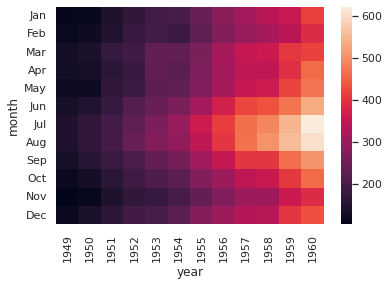

In [169]:
ax = sns.heatmap(flights)

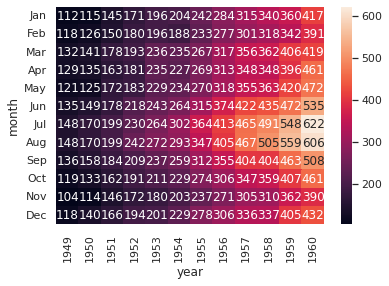

In [170]:
ax = sns.heatmap(flights, annot=True, fmt="d")

#Lambda Funtion

In [163]:
def square(x):
  return x**2

In [164]:
square(2)

4

In [161]:
square2 = lambda x:x**2

In [162]:
square2(2)

4

In [171]:
x = 1
y = 1 if x > 0 else 0
y

1